In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
column_names = ['user_id','item_id','rating','timestamp']

In [6]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_title = pd.read_csv('Movie_Id_Titles')

In [12]:
df = pd.merge(df,movie_title,on='item_id')

In [23]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [25]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [28]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [30]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:
ratings['Number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


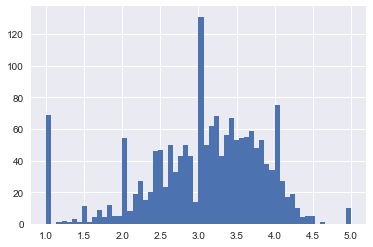

In [39]:
ratings['rating'].hist(bins = 60)

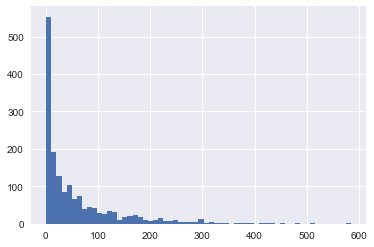

In [41]:
ratings['Number of ratings'].hist(bins = 60)

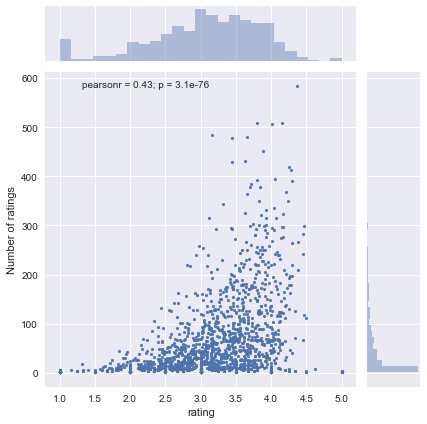

In [47]:
sns.jointplot(y='Number of ratings',x='rating',data=ratings, joint_kws={'s':8})

In [54]:
moviemat = pd.pivot_table(df,index='user_id',columns ='title',values='rating')

In [56]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
corr_starwars = moviemat.corrwith(moviemat['Star Wars (1977)'])

D:\MachineLearn\Anaconda\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\MachineLearn\Anaconda\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [69]:
starwars_with_corr = pd.DataFrame(corr_starwars, columns=['correlation'])

In [71]:
starwars_with_corr.dropna(inplace=True)

In [74]:
starwars_with_corr = starwars_with_corr.join(ratings['Number of ratings'])

In [78]:
starwars_with_corr[starwars_with_corr['Number of ratings']>40].sort_values('correlation',ascending=False).head(10)

,correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
When We Were Kings (1996),0.515164,44
Some Folks Call It a Sling Blade (1993),0.509016,41
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
It Could Happen to You (1994),0.403612,46


In [81]:
corr_Forrest = moviemat.corrwith(moviemat['Forrest Gump (1994)'])
df_with_corr = pd.DataFrame(corr_Forrest, columns=['correlation'])
df_with_corr.dropna(inplace=True)
df_with_corr = df_with_corr.join(ratings['Number of ratings'])
df_with_corr[df_with_corr['Number of ratings']>50].sort_values('correlation',ascending=False).head(5)

D:\MachineLearn\Anaconda\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\MachineLearn\Anaconda\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,correlation,Number of ratings
title,,
Forrest Gump (1994),1.000000,321
"MatchMaker, The (1997)",0.487950,51
Field of Dreams (1989),0.486450,212
Deconstructing Harry (1997),0.474695,65
"Firm, The (1993)",0.464948,151
